In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")

In [3]:
shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# data

In [4]:
z = data[:,0]
dl = data[:,1:]

In [5]:
# scalerz = StandardScaler()
# # scalerz = MinMaxScaler(feature_range=(-1,1))
# # fit scaler on data
# scalerz.fit(z.reshape(-1,1))
# # apply transform
# z = scalerz.transform(z.reshape(-1,1))

In [6]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
z_train, z_test = np.split(z, indx)
dl_train, dl_test = np.split(dll, indx)

In [7]:
# scalerdl.inverse_transform(dl_train.reshape(-1,1))
z_train

array([0.01      , 0.01383342, 0.01913635, 0.02647212, 0.03661999,
       0.05065797, 0.0700773 , 0.09694087, 0.13410237, 0.18550944,
       0.25662299, 0.35499736, 0.49108275, 0.67933539, 0.93975316,
       1.3       , 0.01176156, 0.01627025, 0.02250733, 0.03113533,
       0.04307081, 0.05958165, 0.08242181, 0.11401754])

In [8]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                    min_delta=0.0,
#                                    patience=100,
#                                    restore_best_weights=True)]

In [9]:
def model(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)

    elast = Dense(1, activation='linear')(x)
    return elast

batch_size = 1
epochs = 1000
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 23,461
Trainable params: 23,461
Non-trainable params: 0
_________________________________________________________

In [10]:
model_train = neural_model.fit(z_train, dl_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 0.6872 - val_loss: 0.5505
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7552 - val_loss: 0.0790
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.4371 - val_loss: 0.0590
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3051 - val_loss: 0.2418
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2211 - val_loss: 0.0130
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1768 - val_loss: 0.0088
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0932 - val_loss: 0.0067
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.0093
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0107
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.009

Epoch 82/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 6.5027e-04
Epoch 83/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0133
Epoch 84/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 5.1741e-04
Epoch 85/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0150
Epoch 86/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0202
Epoch 87/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0121
Epoch 88/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0253
Epoch 89/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0022
Epoch 90/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 91/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 -

Epoch 162/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0182
Epoch 163/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 164/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 165/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0121
Epoch 166/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0174
Epoch 167/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.0035
Epoch 168/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 7.4409e-04
Epoch 169/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 170/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 9.6615e-04
Epoch 171/1000
24/24 [==============================] - 0s 2ms/step - loss

24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0076
Epoch 242/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0335
Epoch 243/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0095
Epoch 244/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0014
Epoch 245/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 246/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0021
Epoch 247/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 248/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0110
Epoch 249/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0044
Epoch 250/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 7.5272e-04
Epoch 321/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.7209e-04
Epoch 322/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 3.3608e-04
Epoch 323/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 324/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 5.9175e-04
Epoch 325/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 326/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 6.9008e-04
Epoch 327/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0012
Epoch 328/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 4.5555e-04
Epoch 329/1000
24/24 [==============================] - 0s 2ms/step - los

24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 400/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0027
Epoch 401/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 402/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 8.7264e-04
Epoch 403/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0034
Epoch 404/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.3840e-04
Epoch 405/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 406/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 407/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0098
Epoch 408/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_

24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 479/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 480/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 481/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 6.7969e-04
Epoch 482/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 483/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 484/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 8.1215e-04
Epoch 485/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 9.9198e-04
Epoch 486/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 487/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - 

24/24 [==============================] - 0s 2ms/step - loss: 7.2793e-04 - val_loss: 6.5426e-04
Epoch 558/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 559/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 6.9742e-04
Epoch 560/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 561/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 562/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 563/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0049
Epoch 564/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 565/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 566/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - 

Epoch 636/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 4.1377e-04
Epoch 637/1000
24/24 [==============================] - 0s 2ms/step - loss: 5.7206e-04 - val_loss: 0.0015
Epoch 638/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 639/1000
24/24 [==============================] - 0s 2ms/step - loss: 8.8770e-04 - val_loss: 6.5977e-04
Epoch 640/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 641/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 8.6457e-04
Epoch 642/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 9.8156e-04
Epoch 643/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 644/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 645/1000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 716/1000
24/24 [==============================] - 0s 2ms/step - loss: 6.3141e-04 - val_loss: 8.9715e-04
Epoch 717/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 7.2687e-04
Epoch 718/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 6.5375e-04
Epoch 719/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 3.4987e-04
Epoch 720/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 8.3785e-04
Epoch 721/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 722/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 723/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 2.8948e-04
Epoch 724/1000
24/24 [==============================] - 0s 2ms/step -

24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 794/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 795/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 796/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 1.9848e-04
Epoch 797/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 5.4289e-04
Epoch 798/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 799/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 3.9082e-04
Epoch 800/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 4.0372e-04
Epoch 801/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 9.9436e-04
Epoch 802/1000
24/24 [==============================] - 0s 2ms/step - loss: 0

Epoch 872/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 873/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 4.1225e-04
Epoch 874/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 7.5215e-04
Epoch 875/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 8.6133e-04
Epoch 876/1000
24/24 [==============================] - 0s 2ms/step - loss: 5.9220e-04 - val_loss: 0.0012
Epoch 877/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 878/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0010
Epoch 879/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 880/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 3.9462e-04
Epoch 881/1000
24/24 [==============================] - 0s 2ms

24/24 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0081
Epoch 951/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 952/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 953/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 5.8553e-04
Epoch 954/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 955/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 8.8770e-04
Epoch 956/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 6.7626e-04
Epoch 957/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 958/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 959/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - 

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

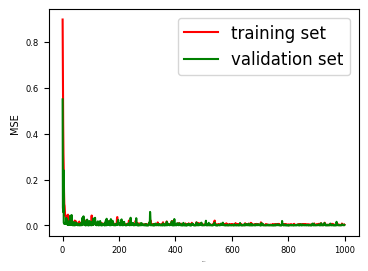

In [11]:
plt.figure(figsize=(4, 3), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=7)
plt.xlabel('Epoch', fontsize=1)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [12]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]
# 300 ep (0.5874642133712769, 0.2920302748680115, 0.8262724280357361)
# 500 ep (0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

(0.002944145118817687, 0.0023228551726788282, 0.0008968611364252865)

In [13]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
ranz = z
# ranzz = ranz
pred_random = neural_model.predict(ranz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random.reshape(-1,1))

In [14]:
# fake_data = np.concatenate((z.reshape(-1,1), dl.reshape(-1,1)), axis=1, )
# fake_data = np.stack((ranz, dlfake.reshape(31,)), axis=1)
index = np.argsort(ranz)
fake_data = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
dl.reshape(31,)

array([32.95388698, 33.84214074, 34.59344598, 35.25209633, 36.06978761,
       36.65111059, 37.43017325, 38.25325404, 39.06785071, 39.79214362,
       40.56495606, 41.42141744, 42.23146107, 43.05273149, 43.97257341,
       44.82186746, 33.87900347, 34.11856704, 34.93902653, 35.74850165,
       36.43457047, 37.15801411, 37.95661635, 38.61286934, 39.3414019 ,
       40.1565346 , 40.90528778, 41.79092346, 42.61704707, 43.50415083,
       44.51408758])

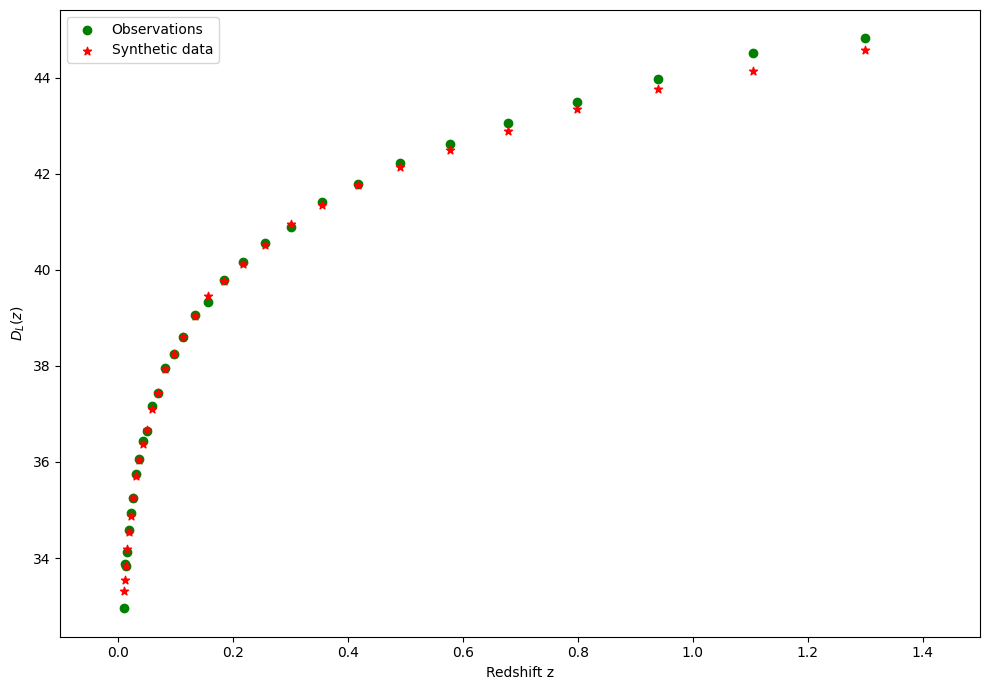

In [21]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(ranz, dlfake, c='r', label='Synthetic data', marker='*')
# plt.errorbar(z, dl, yerr=errors, fmt='g.', markersize=10, label='Observations')
# plt.errorbar(ranz, pred_random, 
#              yerr=fakeerrors, fmt='r.', markersize=10., label='Synthetic data with errors')

# plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$D_L(z)$")
plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [18]:
# neural_model.save('FFNN_JLA.h5')